# Análisis contaminación 

In [3]:
#Librerías de analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

# %matplotlib inline

In [4]:
#lectura de datos
datos = pd.read_excel('Datos/todoslosmeses.xlsx')

In [5]:
datos

,hora,fecha,coedisp,abso,albedo,extinc,cn
0,00:02:00,2017-01-01,19.200,3.51,0.845443,22.710,0.746809
1,00:03:00,2017-01-01,18.800,3.59,0.839661,22.390,0.763830
2,00:04:00,2017-01-01,25.800,4.03,0.864901,29.830,0.857447
3,00:05:00,2017-01-01,20.300,3.82,0.841625,24.120,0.812766
4,00:06:00,2017-01-01,19.700,3.94,0.833333,23.640,0.838298
...,...,...,...,...,...,...,...
241949,23:56:00,2017-06-30,1.430,2.08,0.407407,3.510,0.442553
241950,23:57:00,2017-06-30,0.681,1.80,0.274486,2.481,0.382979
241951,23:58:00,2017-06-30,1.560,2.08,0.428571,3.640,0.442553
241952,23:59:00,2017-06-30,2.060,1.96,0.512438,4.020,0.417021


In [6]:
#info en tabla
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241954 entries, 0 to 241953
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   hora     241954 non-null  object        
 1   fecha    241954 non-null  datetime64[ns]
 2   coedisp  240958 non-null  float64       
 3   abso     228263 non-null  float64       
 4   albedo   227617 non-null  float64       
 5   extinc   227617 non-null  float64       
 6   cn       228263 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.9+ MB


In [7]:
#Reenombrando columnas
datos.columns = ['hora', 'fecha', 'coef_dispersion', 'coef_absorcion',
                 'albedo', 'coef_extincion', 'cn']

In [8]:
# info con nuevos nombres tabla
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241954 entries, 0 to 241953
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   hora             241954 non-null  object        
 1   fecha            241954 non-null  datetime64[ns]
 2   coef_dispersion  240958 non-null  float64       
 3   coef_absorcion   228263 non-null  float64       
 4   albedo           227617 non-null  float64       
 5   coef_extincion   227617 non-null  float64       
 6   cn               228263 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.9+ MB


In [9]:
#datos nulos
datos.isnull().sum()

hora                   0
fecha                  0
coef_dispersion      996
coef_absorcion     13691
albedo             14337
coef_extincion     14337
cn                 13691
dtype: int64

In [10]:
# promedio, desviacion , maximo y mínimo
datos.describe(percentiles=np.linspace(0,1,11))

,coef_dispersion,coef_absorcion,albedo,coef_extincion,cn
count,240958.000000,228263.000000,227617.000000,227617.000000,228263.000000
mean,14.508450,4.183612,0.771034,19.072077,0.890130
std,10.178959,3.831417,0.121241,12.543635,0.815195
min,0.000008,0.000000,0.000005,0.051880,0.000000
0%,0.000008,0.000000,0.000005,0.051880,0.000000
10%,4.190000,1.090000,0.612214,6.260000,0.231915
20%,6.250000,1.650000,0.679668,8.800000,0.351064
30%,8.130000,2.120000,0.724106,11.120000,0.451064
40%,10.000000,2.610000,0.758764,13.510000,0.555319
50%,12.100000,3.130000,0.788504,16.130000,0.665957


In [11]:
datos[datos.cn == datos.cn.min()]

,hora,fecha,coef_dispersion,coef_absorcion,albedo,coef_extincion,cn
113221,05:50:00,2017-03-27,9.98,0.0,1.0,9.98,0.0


In [12]:
datos[datos.albedo == datos.albedo.median()]

,hora,fecha,coef_dispersion,coef_absorcion,albedo,coef_extincion,cn
4812,13:57:00,2017-01-04,10.7,2.87,0.788504,13.57,0.610638
67868,11:57:00,2017-02-21,10.7,2.87,0.788504,13.57,0.610638
127690,01:12:00,2017-04-07,10.7,2.87,0.788504,13.57,0.610638
221990,03:43:00,2017-06-16,10.7,2.87,0.788504,13.57,0.610638


In [13]:
# localizacion de datos
datos[datos.cn == datos.cn.max()]

,hora,fecha,coef_dispersion,coef_absorcion,albedo,coef_extincion,cn
35366,07:34:00,2017-01-27,53.4,81.7,0.395263,135.1,17.383


In [14]:
# tratamiento de nulos, que hacer y que significan
# rellenando nulos
nulos = pd.DataFrame(datos.isnull().sum())
nulos.columns = ['nul_values']
#se crea columna
nulos['porcentaje'] = nulos.nul_values/datos.shape[0] * 100
nulos

,nul_values,porcentaje
hora,0,0.000000
fecha,0,0.000000
coef_dispersion,996,0.411648
coef_absorcion,13691,5.658514
albedo,14337,5.925507
coef_extincion,14337,5.925507
cn,13691,5.658514


In [15]:
# rellenar datos
# datos.fillna(datos.mean(), inplace=True)

In [16]:
pd.DataFrame(nulos.nul_values.sum(),
             index=['total'],
             columns=['nul_values'])

,nul_values
total,57052


In [17]:
#crear fila nueva
nulos.append(
    pd.DataFrame(data=nulos.nul_values.sum(),
                 index=['total'],columns=['nul_values']))

,nul_values,porcentaje
hora,0,0.000000
fecha,0,0.000000
coef_dispersion,996,0.411648
coef_absorcion,13691,5.658514
albedo,14337,5.925507
coef_extincion,14337,5.925507
cn,13691,5.658514
total,57052,NaN


In [18]:
#Chequeo de borrado de nulos
datos.isnull().sum()

hora                   0
fecha                  0
coef_dispersion      996
coef_absorcion     13691
albedo             14337
coef_extincion     14337
cn                 13691
dtype: int64

In [19]:
# datos rellenar nulos
datos.fillna(datos.median(), inplace=True)

<ipython-input-19-0e4b3556c943>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  datos.fillna(datos.median(), inplace=True)


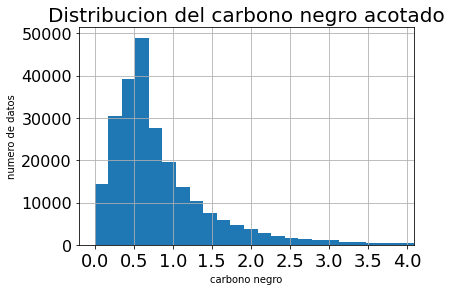

In [20]:
# distribuciones
datos.cn.hist(bins=100)

plt.xlim(-0.2, datos.cn.quantile(0.99))
plt.xlabel('carbono negro')
plt.ylabel(u'numero de datos')
plt.title('Distribucion del carbono negro acotado', fontsize=20,)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16);

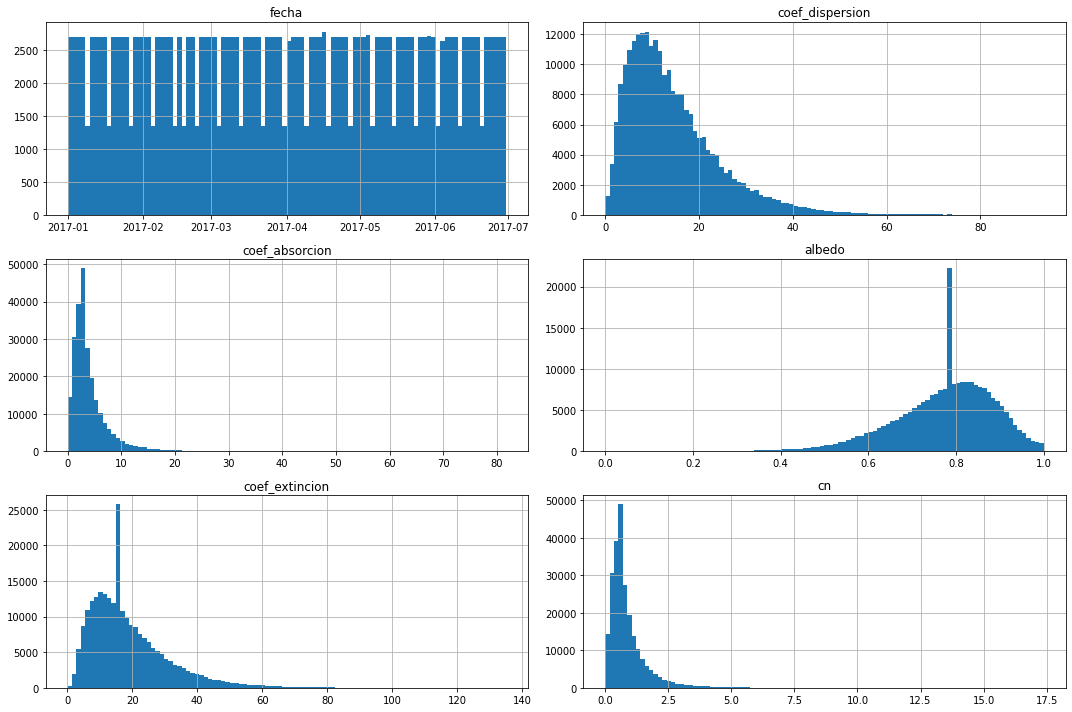

In [21]:
#Histogramas de datos
datos.hist(bins=100, figsize=(15,10)) 
plt.tight_layout()

In [22]:
datos.columns[2:]

Index(['coef_dispersion', 'coef_absorcion', 'albedo', 'coef_extincion', 'cn'], dtype='object')

In [23]:
# para checar corelaciones
datos.corr(method='spearman')

,coef_dispersion,coef_absorcion,albedo,coef_extincion,cn
coef_dispersion,1.000000,0.548968,0.320166,0.936913,0.548968
coef_absorcion,0.548968,1.000000,-0.507234,0.716077,1.000000
albedo,0.320166,-0.507234,1.000000,0.146618,-0.507234
coef_extincion,0.936913,0.716077,0.146618,1.000000,0.716077
cn,0.548968,1.000000,-0.507234,0.716077,1.000000


<AxesSubplot:>

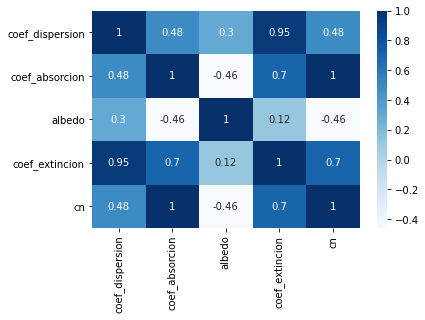

In [25]:
sbn.heatmap(datos.corr(),annot=True,cmap='Blues')